In [1]:
import numpy as np

In [42]:
m=100
n=100
r=20
#epsilon iid suivant une N(0,1) (sigma = 1 => beta = 1)
#beta = 1
# On fixe a et b arbitrairement comme dit sur le paper :
prior_gamma_params={"alpha":1, "beta": 1} #initialiser comme dans paper

In [43]:
A_truth = np.random.normal(loc=0,scale=10,size=(m, r))
B_truth = np.random.normal(loc=0,scale=10,size=(n, r))
noise = np.random.normal(loc=0,scale=1,size=(m,n))

In [44]:
X_truth = A_truth.dot(B_truth.T)

In [45]:
X_noise = X_truth + noise

In [46]:
np.linalg.matrix_rank(X_truth)

20

La matrice est bien de rang 20

In [47]:
def get_gamma_param(A, B, a, b, A_mean, B_mean, Sigma_a, Sigma_b, col_num):
    m=A.shape[0]
    n=B.shape[0]
    m_a= A_mean[:,col_num].T.dot(A_mean[:,col_num]) + m* Sigma_a[col_num,col_num]
    m_b= B_mean[:,col_num].T.dot(B_mean[:,col_num]) + m* Sigma_b[col_num,col_num]
    alpha = a+(m+n)/2.*r
    beta = (2*b + m_a + m_b)/2
    return alpha, beta

In [48]:
#initialiser A et B
A = np.random.normal(loc=0,scale=1,size=(m, r))
B = np.random.normal(loc=0,scale=1,size=(n, r))
Gamma = np.diag(np.array([1./x for x in np.random.gamma(prior_gamma_params["alpha"], prior_gamma_params["beta"], r)]))
#initialiser les moyennes par les valeurs initiales
B_mean = B 
A_mean = A
#initialiser Sigma_b comme l'identité :
Sigma_b = np.identity(r)

In [49]:
%pdb

Automatic pdb calling has been turned OFF


In [50]:
err_noisy

array([ 45125.37457939,     78.88999604,  45125.37457939,     78.88999604,
        45125.37457939,     78.88999604,  45125.37457939,     78.88999604,
        45125.37457939,     78.88999604])

In [51]:
import scipy
max_step = 10
err_ori = np.zeros(max_step)
err_noisy = np.zeros(max_step)
for step in range(max_step):
    err_ori[step] = np.linalg.norm(A_mean.dot(B_mean.T)-X_truth)
    err_noisy[step] = np.linalg.norm(A_mean.dot(B_mean.T)-X_noise)
    print "itération nº",step
    print "-"*20
    print "Erreurs :"
    print "Par rapport à la matrice d'origine : ", err_ori[step]
    print "Par rapport à la matrice bruitée : ", err_noisy[step]
    for i in range(m):
        #calcul de la variance
        Sigma_a = np.linalg.inv((B_mean.T).dot(B_mean)+ Gamma)
        mean_a_line = Sigma_a.dot(B_mean.T).dot(X_noise[i,:].T)
        A[i,:] = np.random.multivariate_normal(mean_a_line,Sigma_a)
        #Mise à jour de la moyenne
        A_mean[i] = mean_a_line
    
    for j in range(n):
        Sigma_b = np.linalg.inv((A_mean.T).dot(A_mean)+ Gamma)
        mean_b_line = Sigma_b.dot(A_mean.T).dot(X_noise[:,j].T)
        B[j,:] = np.random.multivariate_normal(mean_b_line,Sigma_b)
        #Mise à jour de la moyenne
        B_mean[j] = mean_b_line
    for k in range(r):
        a, b = get_gamma_param(
            A, B, prior_gamma_params["alpha"], prior_gamma_params["beta"],A_mean,B_mean, Sigma_a, Sigma_b, k)
        Gamma[k,k] = 1./np.random.gamma(a, 1./b)    

print "step",step+1,":", np.linalg.norm(A_mean.dot(B_mean.T)-X_truth)
    

itération nº 0
--------------------
Erreurs :
Par rapport à la matrice d'origine :  43299.886537
Par rapport à la matrice bruitée :  43299.7467707
itération nº 1
--------------------
Erreurs :
Par rapport à la matrice d'origine :  307.824727749
Par rapport à la matrice bruitée :  311.521504679
itération nº 2
--------------------
Erreurs :
Par rapport à la matrice d'origine :  390.414775385
Par rapport à la matrice bruitée :  393.010210945
itération nº 3
--------------------
Erreurs :
Par rapport à la matrice d'origine :  218.278917827
Par rapport à la matrice bruitée :  223.717675467
itération nº 4
--------------------
Erreurs :
Par rapport à la matrice d'origine :  180.627006123
Par rapport à la matrice bruitée :  187.37541587
itération nº 5
--------------------
Erreurs :
Par rapport à la matrice d'origine :  160.012084911
Par rapport à la matrice bruitée :  167.716173624
itération nº 6
--------------------
Erreurs :
Par rapport à la matrice d'origine :  147.516439628
Par rapport à la

In [55]:
idx

0

In [72]:
import scipy
max_step = 100
k_0_list = [1,5,10,15,20]
err_ori = [np.zeros(max_step) for k in k_0_list]
err_noisy = [np.zeros(max_step) for k in k_0_list]
for idx, k_0 in enumerate(k_0_list):
    print "-"*40
    A_k_0 = np.zeros_like(A_truth)
    A_k_0[:,:k_0] = A_truth[:,:k_0]
    B_k_0 = np.zeros_like(B_truth)
    B_k_0[:,:k_0] = B_truth[:,:k_0]
    X_k_0 = A_k_0.dot(B_k_0.T)
    X_k_0_noise = X_k_0 + noise
    print 
    for step in range(max_step):
        err_ori[idx][step] = np.linalg.norm(A_mean.dot(B_mean.T)-X_k_0)
        err_noisy[idx][step] = np.linalg.norm(A_mean.dot(B_mean.T)-X_k_0_noise)
        if step % 10 == 0:
            print "itération nº",step
            print "Erreurs :"
            print "Par rapport à la matrice d'origine : ", err_ori[idx][step]
            print "Par rapport à la matrice bruitée : ", err_noisy[idx][step]
            print "-"*20
        for i in range(m):
            #calcul de la variance
            Sigma_a = np.linalg.inv((B_mean.T).dot(B_mean)+ Gamma)
            mean_a_line = Sigma_a.dot(B_mean.T).dot(X_k_0_noise[i,:].T)
            A[i,:] = np.random.multivariate_normal(mean_a_line,Sigma_a)
            #Mise à jour de la moyenne
            A_mean[i] = mean_a_line

        for j in range(n):
            Sigma_b = np.linalg.inv((A_mean.T).dot(A_mean)+ Gamma)
            mean_b_line = Sigma_b.dot(A_mean.T).dot(X_k_0_noise[:,j].T)
            B[j,:] = np.random.multivariate_normal(mean_b_line,Sigma_b)
            #Mise à jour de la moyenne
            B_mean[j] = mean_b_line
        for k in range(r):
            a, b= get_gamma_param(
                A, B, prior_gamma_params["alpha"], prior_gamma_params["beta"],A_mean,B_mean, Sigma_a, Sigma_b, k)
            Gamma[k,k] = 1./np.random.gamma(a, 1./b)    

    print "Après ",step+1," itérations, l'erreur est de : ", np.linalg.norm(A_mean.dot(B_mean.T)-X_k_0)


----------------------------------------

itération nº 0
Erreurs :
Par rapport à la matrice d'origine :  35627.8470662
Par rapport à la matrice bruitée :  35628.1378283
--------------------
itération nº 10
Erreurs :
Par rapport à la matrice d'origine :  72.8707851564
Par rapport à la matrice bruitée :  69.8034848075
--------------------
itération nº 20
Erreurs :
Par rapport à la matrice d'origine :  72.7638670037
Par rapport à la matrice bruitée :  69.2797347886
--------------------
itération nº 30
Erreurs :
Par rapport à la matrice d'origine :  72.5858621267
Par rapport à la matrice bruitée :  69.1232233493
--------------------
itération nº 40
Erreurs :
Par rapport à la matrice d'origine :  72.4777895965
Par rapport à la matrice bruitée :  69.0565054548
--------------------
itération nº 50
Erreurs :
Par rapport à la matrice d'origine :  72.4024770206
Par rapport à la matrice bruitée :  69.0230355683
--------------------
itération nº 60
Erreurs :
Par rapport à la matrice d'origine :  7

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

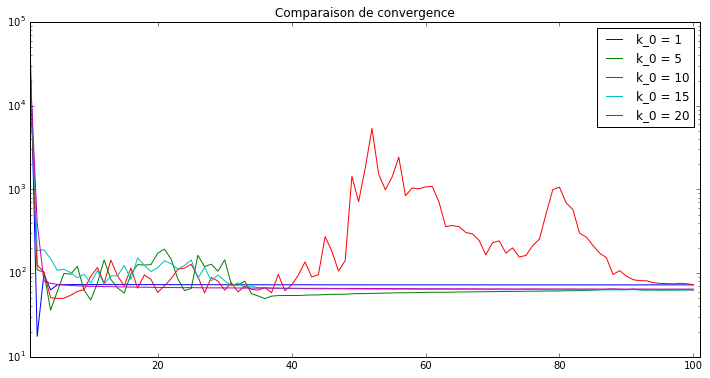

In [74]:
plt.figure(figsize=(12,6))
for i, k_0 in enumerate(k_0_list):
    plt.semilogy(range(1, len(err_ori[i])+1), err_ori[i], label = "k_0 = {}".format(k_0))
plt.xlim(1,len(err_ori[0])+1)
plt.legend()
plt.title("Comparaison de convergence")

In [ ]:
np.linalg.norm(A.dot(B.T)-X_gen)

In [ ]:
mean_a_line.shape, Sigma_a.shape

In [42]:
np.min(Sigma_a)

0.0

In [26]:
mean_a_line[i] = V

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
X=np.zeros((m,n))
cols_to_fill=np.random.choice(n,r,replace=False)
for k in cols_to_fill:
    X[:,k]=np.random.normal(0,1,m)
for k in (set(range(n))-set(cols_to_fill)):
    rand_coefs = np.random.normal(0,1,r)
    X[:,k]=sum([X[:,cols_to_fill[i]]*rand_coefs[i] for i in range(r)])

In [5]:
mean_a

array([[  0.92284887,  -2.47007301,  -2.10590224, ...,  -1.58812097,
          3.05882318,  -0.30392471],
       [  5.12940119,  -0.44404491,  -3.0105268 , ...,   0.23829583,
          1.24466971,  -2.93559611],
       [ -2.97957144,   0.53661026,  -1.47360067, ...,   1.66889876,
          0.13199076,  -2.01840337],
       ..., 
       [ -6.65860565,   2.94412603,  -0.92336414, ...,  -1.41649424,
         -2.74000717,   1.95974028],
       [  3.89330264,   0.84279169,   1.09092452, ...,  -0.72211154,
          5.96339864,  -2.33928196],
       [  6.2822498 ,   2.42412484,   4.94979749, ...,  -0.3605845 ,
         -2.21448133,  10.24788361]])

In [6]:
p=0.3
n_known_coefs=int(p*m*n)
pick_coefs=np.random.choice(m*n, n_known_coefs, replace=False)
known_coefs = [(i%m, i/m) for i in pick_coefs]

In [7]:
#Initialisation
#Les matrices et paramètres
A=np.zeros((m,r))
B=np.zeros((n,r))
gamma=np.random.normal(0,1,r)
beta=.1

In [8]:
#Initialisation de Sigma
Sigma_A = [np.linalg.inv(np.diag(gamma[i])) for i in range(r)]
for i in range(m):
    mean = 
    A[i] = np.random.multivariate_normal

SyntaxError: invalid syntax (<ipython-input-8-e1a37ca03106>, line 4)